<a href="https://colab.research.google.com/github/JoeArmel/JoeArmel/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Connexion Colab Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importatio des données
df=pd.read_csv('gdrive/MyDrive/medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Ajout d'une colonne **'overweight'** qui indique si le patient est en surpoids ou non. On calculera pour cela l'indice de masse corporelle (BMI) qui s'obtient en divisant le masse (en kilogrammes) du patient par le carré de sa taille (en mètres). Si BMI > 25, la personne est en surpoids. La valeur **0** sera utilisée pour **n'est pas en surpoids** et la valeur **1** pour **Est en surpoids**.

In [ ]:
df['overweight'] = (df['weight']/ (df['height'] / 100)**2).apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalisation des données

La normalisation des données ici consiste à faire en sorte que **0 représente toujours les bonnes caractéristiques** et **1 toujours les mauvaises**. Par exemple, si la valeur de 'cholestérol' ou 'gluc' est 1, ce qui signifie que les taux sont normaux, le 1 sera changé en **0**. Si la valeur est supérieure à 1, elle sera changé en **1**. Elle ne concernera que les colonnes *'cholesterol'* et *'gluc'*.

In [ ]:
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x==1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0


In [ ]:
df['gluc'] = df['gluc'].apply(lambda x : 0 if x==1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Construction d'un catplot pour une première visualisation

In [ ]:
cat_vars=['active', 'alco', 'cholesterol',	'gluc',	 	'overweight',	'smoke']
df_cat=pd.melt(df, id_vars=['cardio'], value_vars=cat_vars)
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


In [ ]:
df_cat=df_cat.groupby(['cardio','variable', 'value'], as_index = False).size().rename(columns={'size':'total'})


,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


In [ ]:
df_cat.head(15)

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


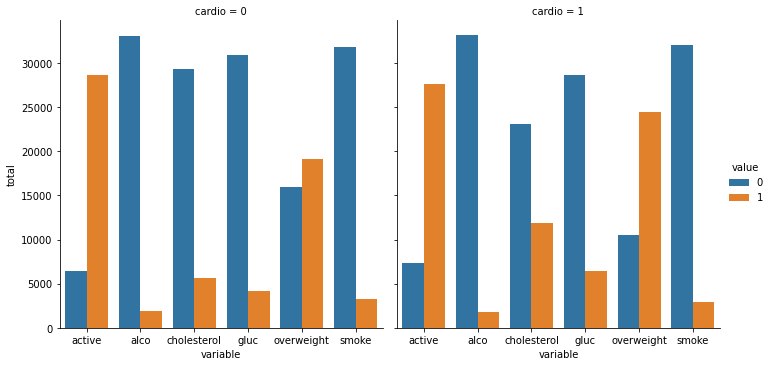

In [ ]:
fig = sns.catplot(x='variable', kind='count', hue='value', col='cardio', order=cat_vars, data=df_cat)
(fig.set_axis_labels('variable', 'total' ));

In [ ]:
fig.savefig('gdrive/MyDrive/catplot.png')

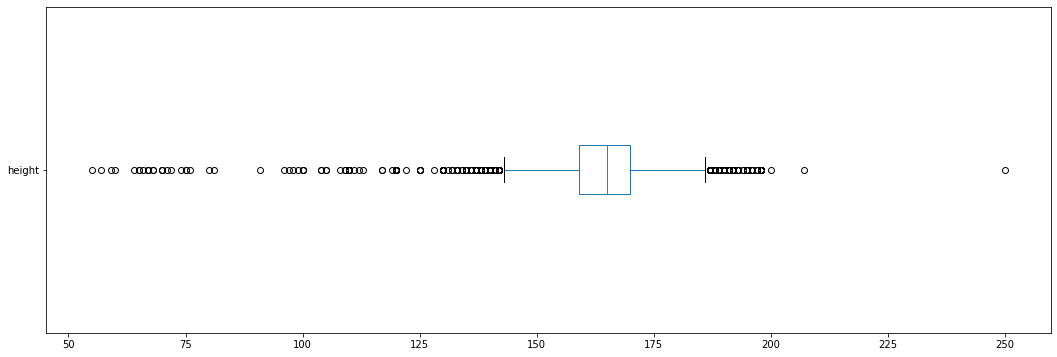

In [ ]:
df['height'].plot(kind="box", vert=False, figsize=(18,6), )

## Construction d'une hitmap

### Nettoyage des données

Nous allons filtrer les segments de patients suivants qui représentent des données incorrectes :


*   la pression diastolique est supérieure à la pression systolique (les données correctes satisfont plutôt le contraire à savoir (df['ap_lo'] <= df['ap_hi']))
*   la taille est inférieure au 2,5e centile (conservez les données correctes avec (df['height'] >= df['height'].quantile(0.025)))
*   la taille est supérieure au 97,5e centile
*   le poids est inférieur au 2,5e centile
*   le poids est supérieur au 97,5e centile








In [ ]:
df_heat = df.loc[(df['ap_lo']<=df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) & 
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight']<= df['weight'].quantile(0.975))]
df_heat.shape[0]

63259

In [ ]:
corr = df_p.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


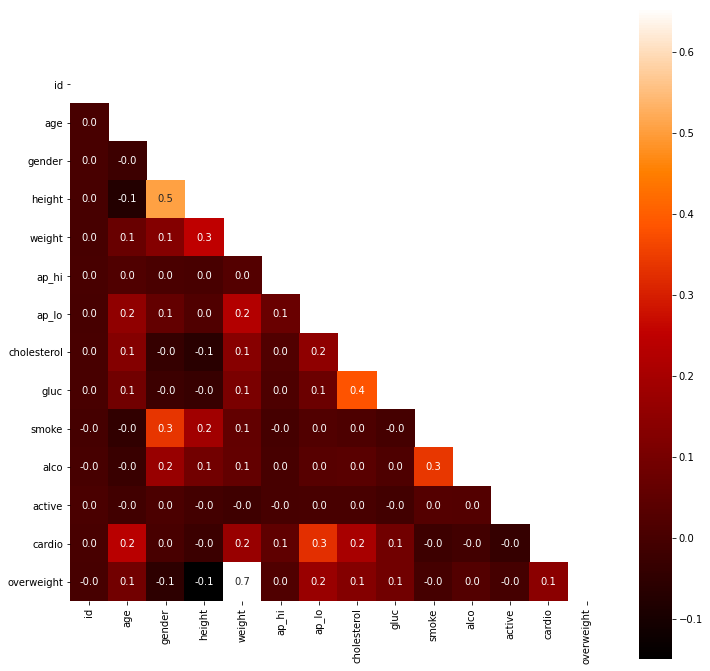

In [ ]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, mask=mask, annot=True, square=True, fmt='.1f', cmap='gist_heat')

In [ ]:
fig.savefig('heatmap.png')